### Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I will be using tmdb-movies dataset.

In this project there are 10 thousand movies(i.e. rows) and around 21 columns.

Questions for the data set:
1. Which movie generated the highest revenue?
2. Which year was the best in accordance with the profit? 
3. What was the average runtime of the movies?
4. Year of release vs revenue generated plot.


In [2]:
#importing packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Here, we will be cleaning and unifying messy and complex data. We will keep only relevant data and drop the data which is not required.

### General Properties

In [3]:
#loading the data and storing it in tmdb_data
tmdb_data=pd.read_csv('tmdb-movies.csv')

#printing the first few lines
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We will be using the unit of currency as dollar.
### Data Cleaning (Removing the data which is not required)
The process of cleaning is as follows:
1. We will be removing the unused data columns like id, imdb_id, vote_count, production_company, keywords, homepage,etc.
2. We will be removing the duplicate rows.
3. Replacing NaN with zero for avoiding errors.

In [4]:
#removing the unwanted columns

delete_col=['id','imdb_id','popularity','budget_adj','revenue_adj','homepage','keywords','overview','production_companies','vote_count','vote_average']

#deleting the above columns
tmdb_data=tmdb_data.drop(delete_col,1)



In [5]:
#confirming the changes
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [6]:
#checking the size of the dataset
tmdb_data.shape

(10866, 10)

In [7]:
#removing the duplicate rows
tmdb_data.drop_duplicates(keep='first',inplace=True)

#reviewing the shape
tmdb_data.shape

(10865, 10)

There was one duplicate row which is removed

In [8]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))


So after removing such entries, we now have only 3853 no.of movies.


In [9]:
#formatting the date to standard format
tmdb_data.release_date=pd.to_datetime(tmdb_data['release_date'])

In [10]:
#viewing the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [11]:
#replacing 0 with NaN of runtime column in the dataset
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

In [12]:
#checking the data types
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [13]:
#changing the data type of budget and revenue

change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movie generated the most and least revenue

In [14]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


### Research Question 2 : Which movie had the most and the least profit?

In [15]:
#calculating the profit
tmdb_data.insert(2,'profit',tmdb_data['revenue']-tmdb_data['budget'])

#solving the question
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


# Research Question 3: What was the average runtime of the movies?

In [16]:
#average runtime
avg_runtime=tmdb_data['runtime'].mean()

print('The average runtime of the movies is {}.'.format(avg_runtime))

The average runtime of the movies is 109.22029060716139.


Text(0.5,1,'Runtime')

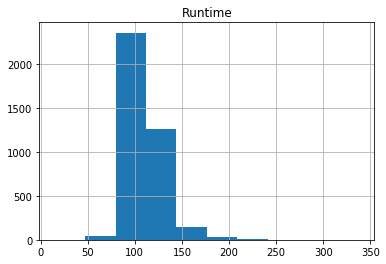

In [21]:
#histogram for the runtime data in the data set
tmdb_data['runtime'].hist()
plt.title('Runtime')

The histogram of the runtime is right skewed.

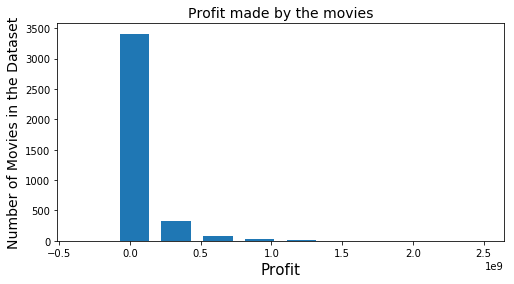

In [56]:
#visualizing the profit of movies
#figure size
plt.figure(figsize=(8,4))

# x-axis and y-axis labels 
plt.xlabel('Profit', fontsize = 15)
plt.ylabel('Number of Movies in the Dataset', fontsize=14)
#Name of the graph
plt.title('Profit made by the movies', fontsize=14)

#histogram plotting
plt.hist(tmdb_data['profit'],rwidth = 0.7)
#displaying
plt.show()

The plot is right skewed.
Almost all the movies have the profit range around 0.1-le9 to 0.5-le9

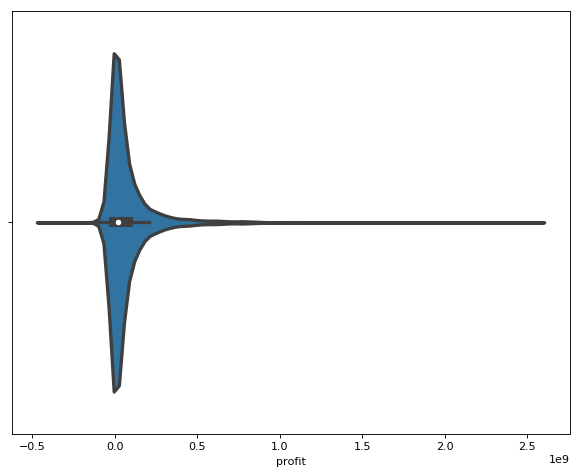

In [25]:
import seaborn as sns
#here is the violin plot of profit(exploring new plotting techniques)
plt.figure(figsize=(9,7), dpi = 80)

#using seaborn for the violin plot and displaying
sns.violinplot(tmdb_data['profit'], linewidth = 3)
plt.show()

The same above graph is depicted using a violin plot from seaborn.

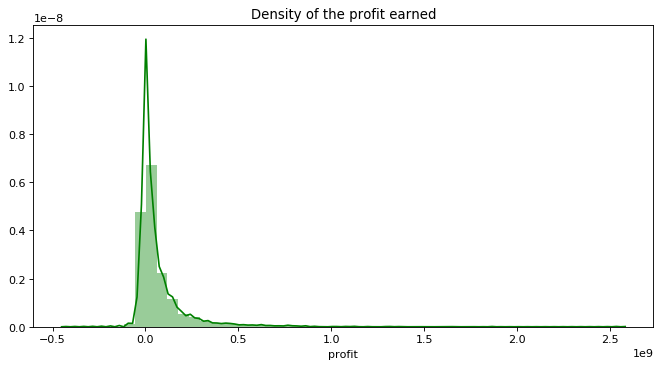

In [26]:
#dist plot for the density

plt.figure(figsize=(10,5), dpi = 80)

#seaborn to generate the plot and displaying
sns.distplot(tmdb_data['profit'], color = 'green')
plt.title('Density of the profit earned')
plt.show()

The density of the profit is more in the region of 0.0 to 0.5 (*le9) and gradually decreases.

# Research Question 4: Year of release vs Revenue generated

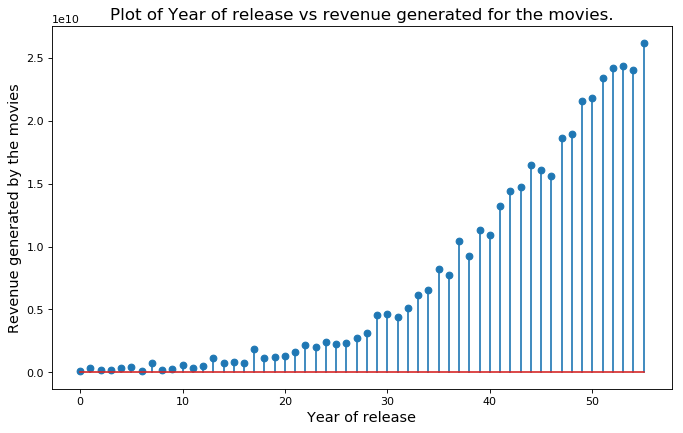

In [22]:
#we will use stem plot for this
yearly_revenue = tmdb_data.groupby('release_year')['revenue'].sum()

#figure size
plt.figure(figsize=(10,6), dpi = 80)

#for x-axis and y-axis labels
plt.xlabel('Year of release', fontsize = 13)
plt.ylabel('Revenue generated by the movies', fontsize = 13)

#name of the graph
plt.title('Plot of Year of release vs revenue generated for the movies.',fontsize=15)

#plotting the graph and displaying
plt.stem(yearly_revenue)
plt.show()

In this graph we can observe that the revenue generated by the movies is exponentially increasing as years are passing.
The graph is left skewed.

In [23]:
yearly_revenue.idxmax()

2015

The year 2015 made the most profit among all the years.

Now we end the analysis of the data set.
Lets move forward towards the conclusion.

# <a id='conclusions'></a>
## Conclusions

Working with this dataset was quite interesting.
After the data analysis with tmdb-movies data set we can conclude:
1. The average runtime of the movies is 109.22029060716139.
2. The movie 'Avatar' generated the most revenue and 'Shattered Glass' generated the least revenue.
3. The movie 'Avatar' made the most profit whereas the movie 'The Warrior's Way' made the least.
4. The histogram of runtime is right skewed.

Limitations:
1. There were missing values present in the data set which we successfully removed/replaced with 0.
2. There were duplicate rows present which were cleaned.
3. The budget and currency column do not have currency unit.

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0